In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed = 4

### Introduccion

Los datos pueden ser descargados en [Kaggle](https://www.kaggle.com/datasets/dhamur/cars-data) o [Github](https://corgis-edu.github.io/corgis/csv/cars/), ademas claro en el repositorio del proyecto en mi cuenta de [Github]()

Este dataset muestra una serie de datos sobre autos de diferentes marcas como el *anio de fabricacion, tipo de transmision, numero de velocidades, tipo de combustible, etc*. La caracteristica a predecir es la *cantidad de millas por galon* que hacen los autos del dataset. Es un ejercicio de **aprendisaje supervisado** utilizando tecnicas de **regresion**.

Los datos deben ser transformados para extraer algunas caracteristicas y eliminar las redundantes, una caracteristica importante es la *cantidad de cilindros del motor* y no viene muy bien definida

In [2]:
df = pd.read_csv('datasets/cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


## Seleccion de datos

Seleccionar las caracteristicas deseadas

### Funcines auxiliares

In [3]:
import re
def get_cylinders_amount(string):
    '''Parse the string of Engine Information.Engine Type and return the amount of cylinder; return Nan if not Found'''
    if (regex := re.search(r'\d+ ([Cc]ylinder|Cyinder)', string)):
        return np.int_(string[regex.start(): regex.start()+2].strip())
    else:
#         print(string)
        return np.nan
    
#clean_cylinders("Audi 3.2L 6 cylinder 250hp 236ft-lbs") # return 6.0

In [4]:
def fill_cylinder_with_maker_mode(row):
    '''If the row has a Nan in Engine Information.Amount of Cylinders it calculates the median of the values for all the cars of the same maker than the one of the row'''
    if(np.isnan(row['Engine Information.Amount of Cylinders'])):
        return df[df['Identification.Make'] == row['Identification.Make']]['Engine Information.Amount of Cylinders'].median()
    else:
        return row['Engine Information.Amount of Cylinders']

### Parseo de Cilindros

Uso de la funcion auxiliar `get_cylinders_amount` para setear en el dataset el numero de cilindros en vez del string completo(hay datos redundantes e inecesarios), hay algunos elementos que no poseen el numero de cilindros por lo que se seteara a Nan.

Para limpiar los datos Nan se calcula la mediana de los cilindros de la marca del elemento en cuestion con `fill_cylinder_with_maker_mode`

In [5]:
df['Engine Information.Amount of Cylinders'] = df['Engine Information.Engine Type'].apply(get_cylinders_amount)
df['Engine Information.Amount of Cylinders'] = df.apply(fill_cylinder_with_maker_mode, axis=1)

print('Cantidad de autos por cantidad de cilindros')
df['Engine Information.Amount of Cylinders'].value_counts().sort_values()

Cantidad de autos por cantidad de cilindros


10.0      32
12.0      80
5.0      162
4.0     1507
8.0     1560
6.0     1735
Name: Engine Information.Amount of Cylinders, dtype: int64

### Explorando Atributo categorico Diferencial

In [6]:
print('Cantidad de autos por tipo de clase de diferencial')
df['Engine Information.Driveline'].value_counts()

Cantidad de autos por tipo de clase de diferencial


Rear-wheel drive     1751
Front-wheel drive    1569
Four-wheel drive      920
All-wheel drive       836
Name: Engine Information.Driveline, dtype: int64

### Explorando Atributo categorico Transmision

In [7]:
print('Cantidad de autos por tipo de clase de Transmision')
df['Identification.Classification'].value_counts()

Cantidad de autos por tipo de clase de Transmision


Automatic transmission    3949
Manual transmission       1127
Name: Identification.Classification, dtype: int64

### Cuantas Marcas hay?

In [8]:
# print(df['Identification.Make'].value_counts())
print('Cantidad de marcas:',len(df['Identification.Make'].value_counts()))

Cantidad de marcas: 47


### Tipo de combustible que utiliza

In [9]:
print('Cantidad de autos por tipo de clase de combustible')
df['Fuel Information.Fuel Type'].value_counts()

Cantidad de autos por tipo de clase de combustible


Gasoline                  4591
E85                        456
Diesel fuel                 27
Compressed natural gas       2
Name: Fuel Information.Fuel Type, dtype: int64

### Tipo de motor
Whether this is a hybrid engine or not - that is, if it uses both an internal combustion engine and an electric motor.

Se convierten los datos de booleano a entero

In [10]:
df['Engine Information.Hybrid'].value_counts()
df['Engine Information.Hybrid'] = df['Engine Information.Hybrid'].astype(int)

### Seleccion de atributos con los que trabajar

In [11]:
columns = ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline',
       'Engine Information.Amount of Cylinders',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg',
       'Fuel Information.Fuel Type',
       'Identification.Classification',
       'Identification.Make',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque']

#### El dataframe de trabajo (cars) va quedando:

In [12]:
cars = df[columns]
cars.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Amount of Cylinders,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Fuel Type,Identification.Classification,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,6.0,1,6,18,Gasoline,Automatic transmission,Audi,2009,250,236
1,140,143,202,Front-wheel drive,4.0,1,6,22,Gasoline,Automatic transmission,Audi,2009,200,207
2,140,143,202,Front-wheel drive,4.0,1,6,21,Gasoline,Manual transmission,Audi,2009,200,207
3,140,143,202,All-wheel drive,4.0,1,6,21,Gasoline,Automatic transmission,Audi,2009,200,207
4,140,143,202,All-wheel drive,4.0,1,6,21,Gasoline,Automatic transmission,Audi,2009,200,207


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dimensions.Height                                5076 non-null   int64  
 1   Dimensions.Length                                5076 non-null   int64  
 2   Dimensions.Width                                 5076 non-null   int64  
 3   Engine Information.Driveline                     5076 non-null   object 
 4   Engine Information.Amount of Cylinders           5076 non-null   float64
 5   Engine Information.Hybrid                        5076 non-null   int32  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64  
 7   Fuel Information.City mpg                        5076 non-null   int64  
 8   Fuel Information.Fuel Type                       5076 non-null   object 
 9   Identification.Classification 

In [14]:
cars.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Amount of Cylinders,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.0,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,6.108747,1.0,5.519110,17.275808,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,1.762330,0.0,0.845637,4.479485,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,1.0,4.000000,8.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,4.000000,1.0,5.000000,14.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,1.0,6.000000,17.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,8.000000,1.0,6.000000,20.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,12.000000,1.0,8.000000,38.000000,2012.000000,638.000000,774.000000


In [15]:
cars.isnull().sum().sum()

0

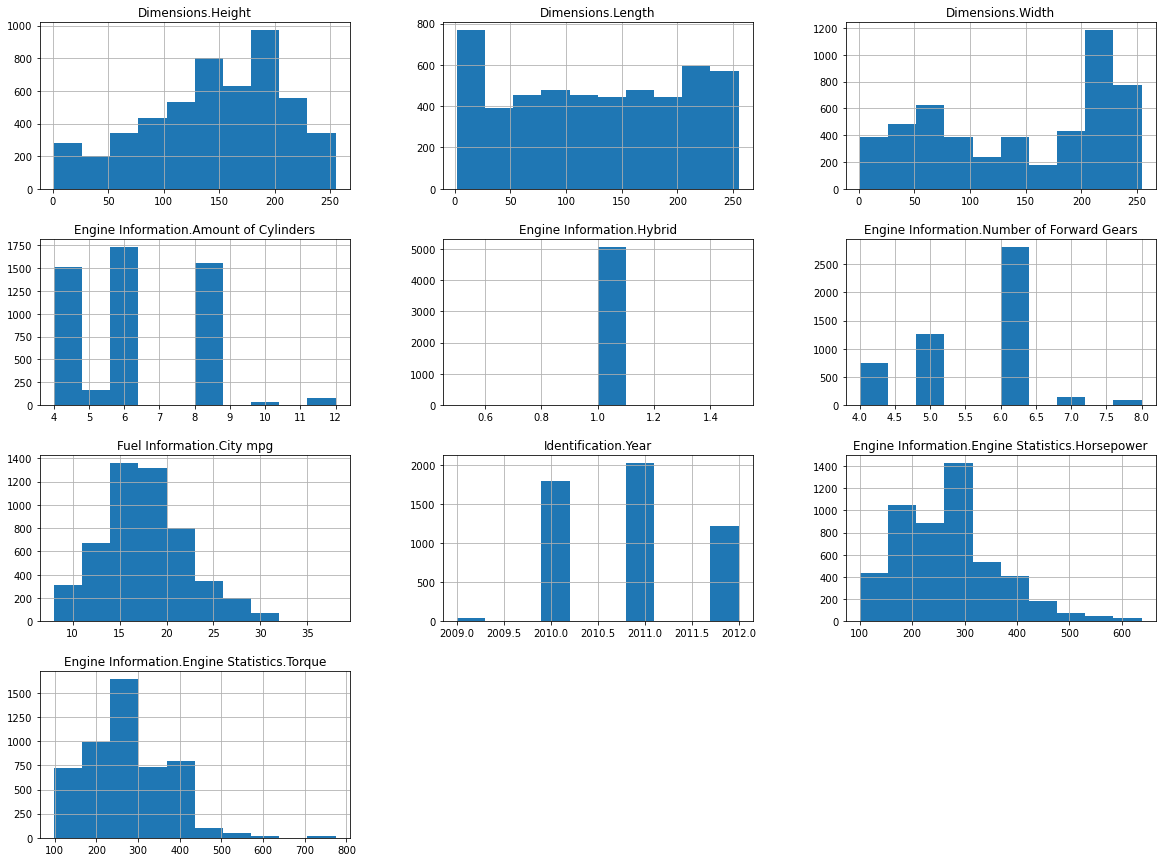

In [16]:
cars.hist(figsize=(20, 15))
plt.show()

### Separar datos de entrenamiento y pruebas

Una caracteristica importante es la cantidad de cilindros, por lo que se desea que la seleccion de set de entrenamiento y prueba sean homogeneos, para esto se usa `StratifiedShuffleSplit`

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit( n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split. split( cars, cars["Engine Information.Amount of Cylinders" ] ) :
    strat_train_set = cars.loc[train_index]
    strat_test_set = cars.loc[test_index]
    
print('Homogeneidad en los datos (CantidadCilindros/Porciento): ')
# strat_test_set["Engine Information.Amount of Cylinders"].value_counts( )/len(strat_test_set) * 100
strat_train_set["Engine Information.Amount of Cylinders"].value_counts( )/len(strat_train_set) * 100

Homogeneidad en los datos (CantidadCilindros/Porciento): 


6.0     34.187192
8.0     30.738916
4.0     29.679803
5.0      3.177340
12.0     1.576355
10.0     0.640394
Name: Engine Information.Amount of Cylinders, dtype: float64

#### Correlacion existente entre el cosumo de combustible con los demas atributos

In [18]:
cars = strat_train_set.copy()
cars.corr()['Fuel Information.City mpg'].sort_values(ascending=False)

Fuel Information.City mpg                          1.000000
Dimensions.Height                                  0.248408
Identification.Year                                0.084535
Dimensions.Length                                 -0.022903
Engine Information.Number of Forward Gears        -0.042042
Dimensions.Width                                  -0.133779
Engine Information.Engine Statistics.Horsepower   -0.701149
Engine Information.Engine Statistics.Torque       -0.753900
Engine Information.Amount of Cylinders            -0.790185
Engine Information.Hybrid                               NaN
Name: Fuel Information.City mpg, dtype: float64

#### Visualizacion de las correlaciones mas significativas

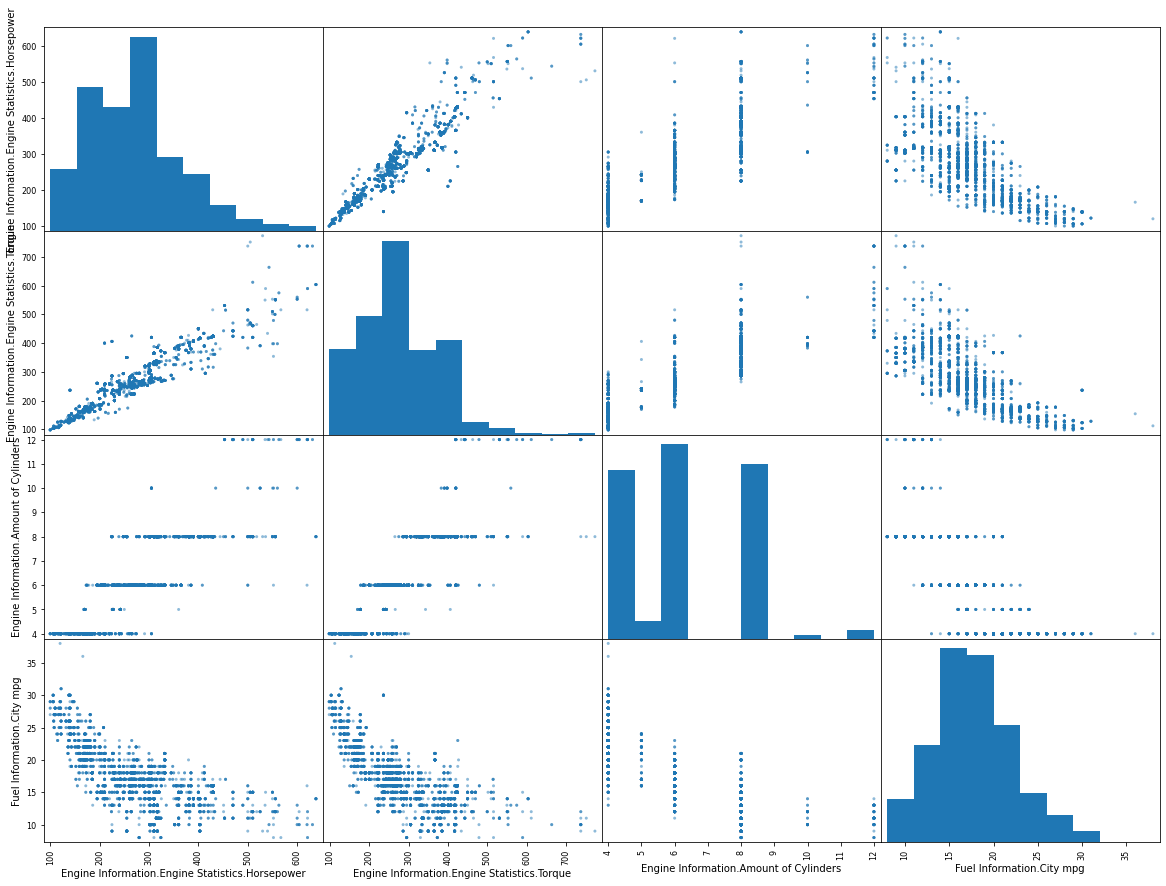

In [19]:
from pandas.plotting import scatter_matrix
atributos = ['Engine Information.Engine Statistics.Horsepower',
             'Engine Information.Engine Statistics.Torque',
             'Engine Information.Amount of Cylinders',
             'Fuel Information.City mpg']
scatter_matrix(cars[atributos], figsize=(20,15))
plt.show()

#### Separar los caracteristicas del atributo objetivo e identificar los datos categoricos y los numericos para la posterior transformacion. 

In [20]:
cars_labels = cars['Fuel Information.City mpg'].copy()
cars.drop('Fuel Information.City mpg', axis=1, inplace=True)

cars_categorical = ['Engine Information.Driveline', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.Make']
cars_numerical = ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Amount of Cylinders', 'Engine Information.Hybrid', 'Engine Information.Number of Forward Gears', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer( [
        ( "num" , StandardScaler(), cars_numerical) ,
        ( "cat" , OneHotEncoder() , cars_categorical) ,
    ])

cars_prepared = full_pipeline.fit_transform(cars)

#### Los datos son transformados a la forma:

In [22]:
pd.DataFrame.sparse.from_spmatrix(cars_prepared, columns=full_pipeline.get_feature_names_out()).head()

,num__Dimensions.Height,num__Dimensions.Length,num__Dimensions.Width,num__Engine Information.Amount of Cylinders,num__Engine Information.Hybrid,num__Engine Information.Number of Forward Gears,num__Identification.Year,num__Engine Information.Engine Statistics.Horsepower,num__Engine Information.Engine Statistics.Torque,cat__Engine Information.Driveline_All-wheel drive,...,cat__Identification.Make_Nissan,cat__Identification.Make_Porsche,cat__Identification.Make_Rolls-Royce,cat__Identification.Make_Saab,cat__Identification.Make_Scion,cat__Identification.Make_Subaru,cat__Identification.Make_Suzuki,cat__Identification.Make_Toyota,cat__Identification.Make_Volkswagen,cat__Identification.Make_Volvo
0,-0.250918,0.714579,1.005492,1.072555,0.0,-0.617813,0.163267,1.237584,1.333177,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.648279,-1.381948,-1.283030,-0.062187,0.0,0.564799,1.435559,0.125505,-0.126537,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.170632,1.607544,0.855425,-0.062187,0.0,0.564799,0.163267,0.977753,1.462268,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.588116,-0.980760,-0.807817,1.072555,0.0,1.747412,-1.109025,2.453596,1.909119,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.026118,0.520456,-0.732784,1.072555,0.0,-0.617813,-1.109025,0.458090,0.518915,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Probando algunos modelos

#### Regresion Lineal

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn. metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_labels)

some_data = cars.iloc[:5]
some_labels = cars_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print( " Predictions: " , lin_reg.predict(some_data_prepared) )
print( " Labels: " , list( some_labels) )

 Predictions:  [12.41099115 16.31860215 14.67162921 14.45756517 15.15545664]
 Labels:  [13, 16, 15, 12, 16]


#### Arbol de desicion

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, cars_labels)

print( " Predictions: " , tree_reg.predict(some_data_prepared) )
print( " Labels: " , list( some_labels) )

 Predictions:  [13. 16. 15. 12. 16.]
 Labels:  [13, 16, 15, 12, 16]


#### Bosques Aleatorios

In [25]:
from sklearn.ensemble import RandomForestRegressor

fores_reg = RandomForestRegressor()
fores_reg.fit(cars_prepared, cars_labels)

print( " Predictions: " , fores_reg.predict(some_data_prepared) )
print( " Labels: " , list( some_labels) )

 Predictions:  [13.   16.07 15.   12.57 16.02]
 Labels:  [13, 16, 15, 12, 16]


### Evaluando modelos con cross_validatoin

In [26]:
def display_scores(scores) :
    print( " Scores: " , scores)
    print( " Mean: " , scores.mean( ) )
    print( " Standard deviation: " , scores.std( ) )

In [27]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-lin_reg_scores)

tree_reg_scores = cross_val_score(tree_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
tree_reg_scores = np.sqrt(-tree_reg_scores)

fores_reg_scores = cross_val_score(fores_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
fores_reg_scores = np.sqrt(-fores_reg_scores)

print("\nRegresion Lineal")
display_scores(lin_reg_scores)

print("\n Arbol de desicion")
display_scores(tree_reg_scores)

print("\n Bosques Aleatorios")
display_scores(fores_reg_scores)


Regresion Lineal
 Scores:  [1.81200094 1.79898648 2.02053238 1.82816234 1.72515897 1.78986672
 1.76002549 1.84155838 1.98055218 1.73093696]
 Mean:  1.8287780835114673
 Standard deviation:  0.09364220888214207

 Arbol de desicion
 Scores:  [0.48559152 0.67194391 0.84557673 0.76408728 0.73695553 1.16093478
 0.62190669 0.44958246 0.69076865 0.68151065]
 Mean:  0.7108858180330436
 Standard deviation:  0.1881313537522288

 Bosques Aleatorios
 Scores:  [0.45928494 0.54536493 0.75581065 0.56095469 0.56225267 1.03032768
 0.54042817 0.44949746 0.58288717 0.4681209 ]
 Mean:  0.5954929265393711
 Standard deviation:  0.16699569344595422


### Tuneando los Hiperparametros

Por ahora el mejor modelo es el de Bosques Aleatorios, se pudiera mejorar su presicion con tuneo de hiperparametros

Habra un numero de combinaciones de parametros 3 x 4 = 12 veces, luego 4 x 3 = 12 veces : 12 + 12 = 24
Y por cada combinacion se usara cross_validation 5 veces lo que deja un total de 24 x 5 = 120 de modelos entrenados

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [30, 40, 50] , 'max_features' : [8, 12, 16, 20] },
    {'bootstrap' : [False] , 'n_estimators' :  [30, 40, 50, 60] , 'max_features' : [16, 20, 24] },
]

fores_reg = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(fores_reg, param_grid, cv=5, scoring='neg_mean_squared_error' , return_train_score=True)
grid_search.fit(cars_prepared, cars_labels)

grid_search.best_params_

{'bootstrap': False, 'max_features': 16, 'n_estimators': 60}

### Obtener el mejor estimador de la prueba

In [29]:
final_model = grid_search.best_estimator_

final_model_scores = cross_val_score(final_model, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
final_model_scores = np.sqrt(-final_model_scores)

print("\n Modelo Final")
display_scores(final_model_scores)


 Modelo Final
 Scores:  [0.41419239 0.4767657  0.71630502 0.63619963 0.41749809 0.88623787
 0.44513635 0.34573589 0.53885242 0.39791226]
 Mean:  0.5274835617439408
 Standard deviation:  0.16137305654579004


### Validando con datos de Pruebas
Estos datos nunca han sido suministrados al modelo.

In [30]:
y_test = strat_test_set['Fuel Information.City mpg'].copy()
X_test = strat_test_set.drop('Fuel Information.City mpg', axis=1)


X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.5859945073123535


### Hacer Prediccion de valor insertado por algun usuario

#### Datos de la primera fila del dataset

In [31]:
input_data = pd.DataFrame([[140, 143, 202, "All-wheel drive", 6.0 , 1, 6, "Gasoline", "Automatic transmission", "Audi", 2009, 250, 236]], columns=cars.columns)
input_data_prepared = full_pipeline.transform(input_data)

print("Prediccion: ", final_model.predict(input_data_prepared))
print("valor Real: ", df['Fuel Information.City mpg'][0])

Prediccion:  [18.]
valor Real:  18


#### Datos de prueba

In [32]:
input_data = pd.DataFrame([[160, 190, 182, "Front-wheel drive", 6.0 , 1, 6, "Diesel fuel", "Automatic transmission", "Ford", 2011, 400, 236]], columns=cars.columns)
input_data_prepared = full_pipeline.transform(input_data)

print("Prediccion: ", final_model.predict(input_data_prepared))

Prediccion:  [16.09583333]


### Conclusion
- El modelo seleccionado fue **RandomForest** con los hiperparametros `{'bootstrap': False, 'max_features': 16, 'n_estimators': 60}`
- El rango de la cantidad de millas por galon oscila es `[8-38] mpg`
- El modelo permite calcular la cantidad de millas por galon de combustible que hace un auto determinado en un ambiente urbano con una exactitud de `+- 0.58 mpg`
- Como es de imaginar **mientras más** caballos de potencia, numero de cilindros tenga el auto, mayor torque del motor e incluso numero de ruedas que el diferencial mueve **disminuye** la cantidad de millas por galon de autonomia